In [168]:
from pprint import pprint
from typing import Dict, Text, Tuple

from models import RetrievalModel, RankingModel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow_datasets as tfds
import tensorflow_ranking as tfr
import tensorflow_recommenders as tfrs

In [79]:
customer_ratings_df = pd.read_csv('clean_data.csv')
operators_df = customer_ratings_df['operator'].unique()

In [80]:
customer_ratings_df = customer_ratings_df[:8000].copy()

In [81]:
customer_ratings = tf.data.Dataset.from_tensor_slices(dict(customer_ratings_df))
operators = tf.data.Dataset.from_tensor_slices(operators_df)

In [82]:
customer_ratings = customer_ratings.map(lambda x: {
    'operator_name': x['operator'],
    'customer_name': x['customer_name'],
    'ticket_subject': x['ticket_subject']
})

In [83]:
tf.random.set_seed(42)
shuffled = customer_ratings.shuffle(8_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(6_400)
test = shuffled.skip(6_400).take(1_600)

In [84]:
operator_names = operators.batch(2_000)
customer_names = customer_ratings.batch(4_000).map(lambda x: x["customer_name"])
ticket_subjects = customer_ratings.batch(200).map(lambda x: x['ticket_subject'])

In [85]:
unique_operator_names = np.unique(np.concatenate(list(operator_names)))
unique_customer_names = np.unique(np.concatenate(list(customer_names)))

---

# Retrieval model

In [144]:
retrieval_model = RetrievalModel(
    operators=operators,
    layer_sizes=[128, 64, 32],
    unique_customer_names=unique_customer_names,
    unique_operator_names=unique_operator_names,
    ticket_subjects=ticket_subjects
)

In [145]:
retrieval_model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.02))

In [146]:
cached_train = train.shuffle(6_000).batch(10000).cache()
cached_test = test.batch(4000).cache()

In [167]:
retrieval_model.fit(
    cached_train, 
    epochs=100,
    validation_data=cached_test,
    validation_freq=5,
    verbose=1
)

Epoch 1/60
1/1 [==============================] - 1s 673ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9853 - factorized_top_k/top_5_categorical_accuracy: 0.9884 - factorized_top_k/top_10_categorical_accuracy: 0.9892 - factorized_top_k/top_50_categorical_accuracy: 0.9969 - factorized_top_k/top_100_categorical_accuracy: 0.9978 - loss: 25742.7168 - regularization_loss: 0.0000e+00 - total_loss: 25742.7168
Epoch 2/60
1/1 [==============================] - 0s 412ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9861 - factorized_top_k/top_5_categorical_accuracy: 0.9883 - factorized_top_k/top_10_categorical_accuracy: 0.9895 - factorized_top_k/top_50_categorical_accuracy: 0.9967 - factorized_top_k/top_100_categorical_accuracy: 0.9973 - loss: 25587.2852 - regularization_loss: 0.0000e+00 - total_loss: 25587.2852
Epoch 3/60
1/1 [==============================] - 0s 430ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9855 - factorized_top_k/top_5_categorical_accuracy: 0.9

1/1 [==============================] - 0s 418ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9884 - factorized_top_k/top_5_categorical_accuracy: 0.9902 - factorized_top_k/top_10_categorical_accuracy: 0.9912 - factorized_top_k/top_50_categorical_accuracy: 0.9969 - factorized_top_k/top_100_categorical_accuracy: 0.9972 - loss: 22679.1797 - regularization_loss: 0.0000e+00 - total_loss: 22679.1797
Epoch 18/60
1/1 [==============================] - 0s 378ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9889 - factorized_top_k/top_5_categorical_accuracy: 0.9908 - factorized_top_k/top_10_categorical_accuracy: 0.9916 - factorized_top_k/top_50_categorical_accuracy: 0.9969 - factorized_top_k/top_100_categorical_accuracy: 0.9975 - loss: 22432.2852 - regularization_loss: 0.0000e+00 - total_loss: 22432.2852
Epoch 19/60
1/1 [==============================] - 0s 398ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9884 - factorized_top_k/top_5_categorical_accuracy: 0.9902 - fac

1/1 [==============================] - 0s 389ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9842 - factorized_top_k/top_5_categorical_accuracy: 0.9855 - factorized_top_k/top_10_categorical_accuracy: 0.9867 - factorized_top_k/top_50_categorical_accuracy: 0.9964 - factorized_top_k/top_100_categorical_accuracy: 0.9981 - loss: 35890.1328 - regularization_loss: 0.0000e+00 - total_loss: 35890.1328
Epoch 34/60
1/1 [==============================] - 0s 390ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9823 - factorized_top_k/top_5_categorical_accuracy: 0.9841 - factorized_top_k/top_10_categorical_accuracy: 0.9853 - factorized_top_k/top_50_categorical_accuracy: 0.9955 - factorized_top_k/top_100_categorical_accuracy: 0.9964 - loss: 34545.1914 - regularization_loss: 0.0000e+00 - total_loss: 34545.1914
Epoch 35/60
1/1 [==============================] - 1s 610ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9858 - factorized_top_k/top_5_categorical_accuracy: 0.9878 - fac

1/1 [==============================] - 0s 372ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9912 - factorized_top_k/top_5_categorical_accuracy: 0.9923 - factorized_top_k/top_10_categorical_accuracy: 0.9930 - factorized_top_k/top_50_categorical_accuracy: 0.9973 - factorized_top_k/top_100_categorical_accuracy: 0.9983 - loss: 18718.5059 - regularization_loss: 0.0000e+00 - total_loss: 18718.5059
Epoch 50/60
1/1 [==============================] - 1s 552ms/step - factorized_top_k/top_1_categorical_accuracy: 0.9911 - factorized_top_k/top_5_categorical_accuracy: 0.9925 - factorized_top_k/top_10_categorical_accuracy: 0.9933 - factorized_top_k/top_50_categorical_accuracy: 0.9978 - factorized_top_k/top_100_categorical_accuracy: 0.9984 - loss: 18578.1523 - regularization_loss: 0.0000e+00 - total_loss: 18578.1523 - val_factorized_top_k/top_1_categorical_accuracy: 0.0712 - val_factorized_top_k/top_5_categorical_accuracy: 0.0819 - val_factorized_top_k/top_10_categorical_accuracy: 0.0875 - v

In [136]:
retrieval_model.evaluate(cached_test, return_dict=True)

1/1 [==============================] - 0s 214ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0350 - factorized_top_k/top_5_categorical_accuracy: 0.0481 - factorized_top_k/top_10_categorical_accuracy: 0.0625 - factorized_top_k/top_50_categorical_accuracy: 0.3806 - factorized_top_k/top_100_categorical_accuracy: 0.3962 - loss: 27152.2578 - regularization_loss: 0.0000e+00 - total_loss: 27152.2578


{'factorized_top_k/top_1_categorical_accuracy': 0.03500000014901161,
 'factorized_top_k/top_5_categorical_accuracy': 0.048124998807907104,
 'factorized_top_k/top_10_categorical_accuracy': 0.0625,
 'factorized_top_k/top_50_categorical_accuracy': 0.3806249797344208,
 'factorized_top_k/top_100_categorical_accuracy': 0.3962499797344208,
 'loss': 27152.2578125,
 'regularization_loss': 0,
 'total_loss': 27152.2578125}

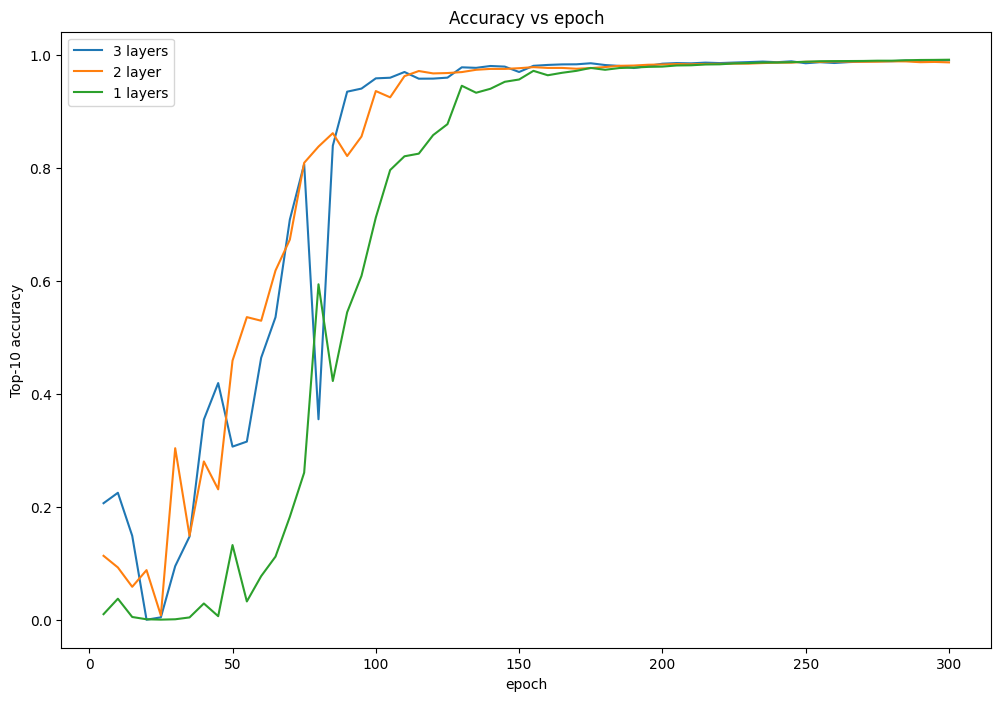

In [166]:
num_validation_runs = len(two_layer_history.history["factorized_top_k/top_10_categorical_accuracy"])
epochs = [(x + 1)* 5 for x in range(num_validation_runs)]

plt.figure(figsize=(12,8))
plt.plot(epochs, three_layer_history.history["factorized_top_k/top_10_categorical_accuracy"], label="3 layers")
plt.plot(epochs, two_layer_history.history["factorized_top_k/top_10_categorical_accuracy"], label="2 layer")
plt.plot(epochs, one_layer_history.history["factorized_top_k/top_10_categorical_accuracy"], label="1 layers")
plt.title("Accuracy vs epoch")
plt.xlabel("epoch")
plt.ylabel("Top-10 accuracy");

plt.legend()

plt.savefig('compare-deep.png')

In [164]:
accuracy = one_layer_history.history["val_factorized_top_k/top_10_categorical_accuracy"][-1]
print(f"Top-10 accuracy: {accuracy:.2f}.")

Top-10 accuracy: 0.01.


In [95]:
index = tfrs.layers.factorized_top_k.BruteForce(retrieval_model.query_model, k=20)

In [60]:
index.index_from_dataset(
  tf.data.Dataset.zip((operators.batch(100), operators.batch(100).map(retrieval_model.candidate_model)))
)

In [61]:
customer_test = {'customer_name': tf.expand_dims('Charlotte Doyle', axis=0), 
                 'ticket_subject': tf.expand_dims('Display issue', axis=0)
                }

In [62]:
_, operator_suggestions = index(customer_test)
print(f"Recommendations for user {customer_test['customer_name']}: {operator_suggestions[0, :]}")

Recommendations for user [b'Charlotte Doyle']: [b'Karina Moore' b'David Coleman' b'James Briggs' b'Michael Miller'
 b'Amanda Singleton' b'Colton Cunningham' b'Henry Erickson'
 b'Amber Fowler' b'Jessica Andrade' b'Michael Pittman' b'Karen Coffey'
 b'Colleen Richardson' b'Kimberly Davis' b'Jesus Howell' b'Thomas Scott'
 b'Sydney Johnson' b'Kristen Wiggins' b'Kathryn Frazier' b'Eric Morton'
 b'Robert Young']


---

# Ranking Model

In [63]:
ratings = tf.data.Dataset.from_tensor_slices({
    'operator_name': customer_ratings_df['operator'],
    'customer_name': customer_ratings_df['customer_name'],
    'rating': customer_ratings_df['customer_satisfaction_rating'],
})

In [64]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(8_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(6_400)
test = shuffled.skip(6_400).take(1_600)

In [65]:
ranking_model = RankingModel(
    unique_customer_names=unique_customer_names, 
    unique_operator_names=unique_operator_names)

In [66]:
ranking_model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.02))

In [67]:
cached_train = train.shuffle(6_000).batch(10000).cache()
cached_test = test.batch(4000).cache()

In [68]:
ranking_model.fit(cached_train, epochs=500)

Epoch 1/500


2023-12-05 17:41:19.443673: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adagrad/AssignAddVariableOp.


1/1 [==============================] - 1s 866ms/step - root_mean_squared_error: 3.1608 - loss: 9.9906 - regularization_loss: 0.0000e+00 - total_loss: 9.9906
Epoch 2/500
1/1 [==============================] - 0s 43ms/step - root_mean_squared_error: 2.9290 - loss: 8.5792 - regularization_loss: 0.0000e+00 - total_loss: 8.5792
Epoch 3/500
1/1 [==============================] - 0s 29ms/step - root_mean_squared_error: 2.5981 - loss: 6.7503 - regularization_loss: 0.0000e+00 - total_loss: 6.7503
Epoch 4/500
1/1 [==============================] - 0s 14ms/step - root_mean_squared_error: 2.1822 - loss: 4.7619 - regularization_loss: 0.0000e+00 - total_loss: 4.7619
Epoch 5/500
1/1 [==============================] - 0s 26ms/step - root_mean_squared_error: 1.6989 - loss: 2.8861 - regularization_loss: 0.0000e+00 - total_loss: 2.8861
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - root_mean_squared_error: 1.2520 - loss: 1.5675 - regularization_loss: 0.0000e+00 - total_loss: 1.5675
Epo

1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9681 - loss: 0.9371 - regularization_loss: 0.0000e+00 - total_loss: 0.9371
Epoch 50/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9680 - loss: 0.9371 - regularization_loss: 0.0000e+00 - total_loss: 0.9371
Epoch 51/500
1/1 [==============================] - 0s 10ms/step - root_mean_squared_error: 0.9680 - loss: 0.9371 - regularization_loss: 0.0000e+00 - total_loss: 0.9371
Epoch 52/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9680 - loss: 0.9370 - regularization_loss: 0.0000e+00 - total_loss: 0.9370
Epoch 53/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9680 - loss: 0.9370 - regularization_loss: 0.0000e+00 - total_loss: 0.9370
Epoch 54/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9679 - loss: 0.9369 - regularization_loss: 0.0000e+00 - total_loss: 0.9369

1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9670 - loss: 0.9350 - regularization_loss: 0.0000e+00 - total_loss: 0.9350
Epoch 98/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9669 - loss: 0.9350 - regularization_loss: 0.0000e+00 - total_loss: 0.9350
Epoch 99/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9669 - loss: 0.9349 - regularization_loss: 0.0000e+00 - total_loss: 0.9349
Epoch 100/500
1/1 [==============================] - 0s 10ms/step - root_mean_squared_error: 0.9669 - loss: 0.9349 - regularization_loss: 0.0000e+00 - total_loss: 0.9349
Epoch 101/500
1/1 [==============================] - 0s 10ms/step - root_mean_squared_error: 0.9669 - loss: 0.9348 - regularization_loss: 0.0000e+00 - total_loss: 0.9348
Epoch 102/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9668 - loss: 0.9348 - regularization_loss: 0.0000e+00 - total_loss: 0.9

1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9657 - loss: 0.9326 - regularization_loss: 0.0000e+00 - total_loss: 0.9326
Epoch 146/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9657 - loss: 0.9326 - regularization_loss: 0.0000e+00 - total_loss: 0.9326
Epoch 147/500
1/1 [==============================] - 0s 21ms/step - root_mean_squared_error: 0.9657 - loss: 0.9325 - regularization_loss: 0.0000e+00 - total_loss: 0.9325
Epoch 148/500
1/1 [==============================] - 0s 13ms/step - root_mean_squared_error: 0.9656 - loss: 0.9324 - regularization_loss: 0.0000e+00 - total_loss: 0.9324
Epoch 149/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9656 - loss: 0.9324 - regularization_loss: 0.0000e+00 - total_loss: 0.9324
Epoch 150/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9656 - loss: 0.9323 - regularization_loss: 0.0000e+00 - total_loss: 0

1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9642 - loss: 0.9296 - regularization_loss: 0.0000e+00 - total_loss: 0.9296
Epoch 194/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9641 - loss: 0.9296 - regularization_loss: 0.0000e+00 - total_loss: 0.9296
Epoch 195/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9641 - loss: 0.9295 - regularization_loss: 0.0000e+00 - total_loss: 0.9295
Epoch 196/500
1/1 [==============================] - 0s 13ms/step - root_mean_squared_error: 0.9641 - loss: 0.9294 - regularization_loss: 0.0000e+00 - total_loss: 0.9294
Epoch 197/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9640 - loss: 0.9294 - regularization_loss: 0.0000e+00 - total_loss: 0.9294
Epoch 198/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9640 - loss: 0.9293 - regularization_loss: 0.0000e+00 - total_loss: 0

1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9622 - loss: 0.9259 - regularization_loss: 0.0000e+00 - total_loss: 0.9259
Epoch 242/500
1/1 [==============================] - 0s 13ms/step - root_mean_squared_error: 0.9622 - loss: 0.9258 - regularization_loss: 0.0000e+00 - total_loss: 0.9258
Epoch 243/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9622 - loss: 0.9257 - regularization_loss: 0.0000e+00 - total_loss: 0.9257
Epoch 244/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9621 - loss: 0.9256 - regularization_loss: 0.0000e+00 - total_loss: 0.9256
Epoch 245/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9621 - loss: 0.9255 - regularization_loss: 0.0000e+00 - total_loss: 0.9255
Epoch 246/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9620 - loss: 0.9255 - regularization_loss: 0.0000e+00 - total_loss: 0

1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9596 - loss: 0.9209 - regularization_loss: 0.0000e+00 - total_loss: 0.9209
Epoch 290/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9596 - loss: 0.9208 - regularization_loss: 0.0000e+00 - total_loss: 0.9208
Epoch 291/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9595 - loss: 0.9206 - regularization_loss: 0.0000e+00 - total_loss: 0.9206
Epoch 292/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9594 - loss: 0.9205 - regularization_loss: 0.0000e+00 - total_loss: 0.9205
Epoch 293/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9594 - loss: 0.9204 - regularization_loss: 0.0000e+00 - total_loss: 0.9204
Epoch 294/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9593 - loss: 0.9203 - regularization_loss: 0.0000e+00 - total_loss: 0

1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9560 - loss: 0.9139 - regularization_loss: 0.0000e+00 - total_loss: 0.9139
Epoch 338/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9559 - loss: 0.9137 - regularization_loss: 0.0000e+00 - total_loss: 0.9137
Epoch 339/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9558 - loss: 0.9136 - regularization_loss: 0.0000e+00 - total_loss: 0.9136
Epoch 340/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9557 - loss: 0.9134 - regularization_loss: 0.0000e+00 - total_loss: 0.9134
Epoch 341/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9556 - loss: 0.9132 - regularization_loss: 0.0000e+00 - total_loss: 0.9132
Epoch 342/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9555 - loss: 0.9130 - regularization_loss: 0.0000e+00 - total_loss: 0

1/1 [==============================] - 0s 13ms/step - root_mean_squared_error: 0.9508 - loss: 0.9040 - regularization_loss: 0.0000e+00 - total_loss: 0.9040
Epoch 386/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9507 - loss: 0.9038 - regularization_loss: 0.0000e+00 - total_loss: 0.9038
Epoch 387/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9505 - loss: 0.9035 - regularization_loss: 0.0000e+00 - total_loss: 0.9035
Epoch 388/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9504 - loss: 0.9033 - regularization_loss: 0.0000e+00 - total_loss: 0.9033
Epoch 389/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9503 - loss: 0.9030 - regularization_loss: 0.0000e+00 - total_loss: 0.9030
Epoch 390/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9501 - loss: 0.9027 - regularization_loss: 0.0000e+00 - total_loss: 0

1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9431 - loss: 0.8894 - regularization_loss: 0.0000e+00 - total_loss: 0.8894
Epoch 434/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9429 - loss: 0.8890 - regularization_loss: 0.0000e+00 - total_loss: 0.8890
Epoch 435/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9427 - loss: 0.8886 - regularization_loss: 0.0000e+00 - total_loss: 0.8886
Epoch 436/500
1/1 [==============================] - 0s 12ms/step - root_mean_squared_error: 0.9425 - loss: 0.8883 - regularization_loss: 0.0000e+00 - total_loss: 0.8883
Epoch 437/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9423 - loss: 0.8879 - regularization_loss: 0.0000e+00 - total_loss: 0.8879
Epoch 438/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9421 - loss: 0.8875 - regularization_loss: 0.0000e+00 - total_loss: 0

1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9317 - loss: 0.8680 - regularization_loss: 0.0000e+00 - total_loss: 0.8680
Epoch 482/500
1/1 [==============================] - 0s 10ms/step - root_mean_squared_error: 0.9314 - loss: 0.8674 - regularization_loss: 0.0000e+00 - total_loss: 0.8674
Epoch 483/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9311 - loss: 0.8669 - regularization_loss: 0.0000e+00 - total_loss: 0.8669
Epoch 484/500
1/1 [==============================] - 0s 10ms/step - root_mean_squared_error: 0.9308 - loss: 0.8663 - regularization_loss: 0.0000e+00 - total_loss: 0.8663
Epoch 485/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9305 - loss: 0.8658 - regularization_loss: 0.0000e+00 - total_loss: 0.8658
Epoch 486/500
1/1 [==============================] - 0s 11ms/step - root_mean_squared_error: 0.9302 - loss: 0.8652 - regularization_loss: 0.0000e+00 - total_loss: 0

In [69]:
ranking_model.evaluate(cached_test, return_dict=True)

1/1 [==============================] - 0s 154ms/step - root_mean_squared_error: 0.9861 - loss: 0.9724 - regularization_loss: 0.0000e+00 - total_loss: 0.9724


{'root_mean_squared_error': 0.9861101508140564,
 'loss': 0.972413182258606,
 'regularization_loss': 0,
 'total_loss': 0.972413182258606}

In [70]:
suggested_titles = operator_suggestions[0].numpy()

In [71]:
suggested_titles

array([b'Karina Moore', b'David Coleman', b'James Briggs',
       b'Michael Miller', b'Amanda Singleton', b'Colton Cunningham',
       b'Henry Erickson', b'Amber Fowler', b'Jessica Andrade',
       b'Michael Pittman', b'Karen Coffey', b'Colleen Richardson',
       b'Kimberly Davis', b'Jesus Howell', b'Thomas Scott',
       b'Sydney Johnson', b'Kristen Wiggins', b'Kathryn Frazier',
       b'Eric Morton', b'Robert Young'], dtype=object)

In [72]:
test_ratings = {}
for operator_name in suggested_titles:
    test_ratings[operator_name] = ranking_model({
        "customer_name": np.array(['Charlotte Doyle']),
        "operator_name": np.array([operator_name])
    })

In [73]:
print("Ratings:")
for title, score in sorted(test_ratings.items(), key=lambda x: x[1], reverse=True):
    print(f"operator name: {title}: {score}")

Ratings:
operator name: b'James Briggs': [[3.1439857]]
operator name: b'Colleen Richardson': [[3.0733552]]
operator name: b'David Coleman': [[3.0687041]]
operator name: b'Kristen Wiggins': [[3.06415]]
operator name: b'Michael Pittman': [[3.0388944]]
operator name: b'Karen Coffey': [[3.029041]]
operator name: b'Amber Fowler': [[3.028504]]
operator name: b'Amanda Singleton': [[3.0284731]]
operator name: b'Sydney Johnson': [[3.028147]]
operator name: b'Jesus Howell': [[3.0257425]]
operator name: b'Robert Young': [[3.002689]]
operator name: b'Jessica Andrade': [[2.9936128]]
operator name: b'Colton Cunningham': [[2.9653747]]
operator name: b'Kathryn Frazier': [[2.964114]]
operator name: b'Karina Moore': [[2.9375877]]
operator name: b'Eric Morton': [[2.9099796]]
operator name: b'Kimberly Davis': [[2.9082077]]
operator name: b'Thomas Scott': [[2.88562]]
operator name: b'Michael Miller': [[2.8064194]]
operator name: b'Henry Erickson': [[2.774959]]


In [74]:
filtered_df = customer_ratings_df[customer_ratings_df['operator'].isin(operator_suggestions[0].numpy().astype(str))]

In [75]:
filtered_df.groupby('operator')['customer_satisfaction_rating'].mean().sort_values(ascending=False)

operator
Kristen Wiggins       3.500000
Amber Fowler          3.416667
Colleen Richardson    3.272727
James Briggs          3.166667
Kimberly Davis        3.125000
Sydney Johnson        3.062500
Karina Moore          3.045455
Amanda Singleton      2.950000
Karen Coffey          2.928571
Robert Young          2.900000
Jesus Howell          2.888889
David Coleman         2.882353
Michael Miller        2.875000
Thomas Scott          2.846154
Michael Pittman       2.812500
Eric Morton           2.800000
Jessica Andrade       2.750000
Colton Cunningham     2.750000
Henry Erickson        2.730769
Kathryn Frazier       2.583333
Name: customer_satisfaction_rating, dtype: float64